In [1]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
from compel import Compel

print(torch.cuda.is_available())  # 应该返回True
print(torch.version.cuda) 

/data/homework0/anaconda3/envs/wyt/lib/python3.8/site-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/data/homework0/anaconda3/envs/wyt/lib/python3.8/site-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


True
11.7


# 加载模型

In [2]:
model_path = "/data/homework0/wyt/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b"
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'

pipeline = AutoPipelineForInpainting.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

pipeline.enable_model_cpu_offload()

compel = Compel(tokenizer=pipeline.tokenizer, text_encoder=pipeline.text_encoder)

/data/homework0/anaconda3/envs/wyt/lib/python3.8/site-packages/diffusers/pipelines/pipeline_utils.py:783: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint /data/homework0/wyt/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove i

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/data/homework0/anaconda3/envs/wyt/lib/python3.8/site-packages/diffusers/pipelines/deprecated/stable_diffusion_variants/pipeline_stable_diffusion_inpaint_legacy.py:141: FutureWarning: The class <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> is deprecated and will be removed in v1.0.0. You can achieve exactly the same functionalityby loading your model into `StableDiffusionInpaintPipeline` instead. See https://github.com/huggingface/diffusers/pull/3533for more information.
  deprecate("legacy is outdated", "1.0.0", deprecation_message, standard_warn=False)
/data/homework0/anaconda3/envs/wyt/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# 图像去噪的参数

In [3]:
img_width = 800
img_height = 600
prompt = "smile, smooth face"
negative_prompt="mosaic, noise, low quality, aliasing, blurry, bad lighting, bad anatomy, poorly drawn face"
guidance_scale=4
generator = torch.Generator(device).manual_seed(100)
init_image_path = "./init.jpg"
init_image = load_image(init_image_path)
mask_image_path = "./mask.jpg"
mask_image = load_image(mask_image_path)
num_inference_steps = 200
strength = 0.5
padding_mask_crop = 40

  0%|          | 0/100 [00:00<?, ?it/s]

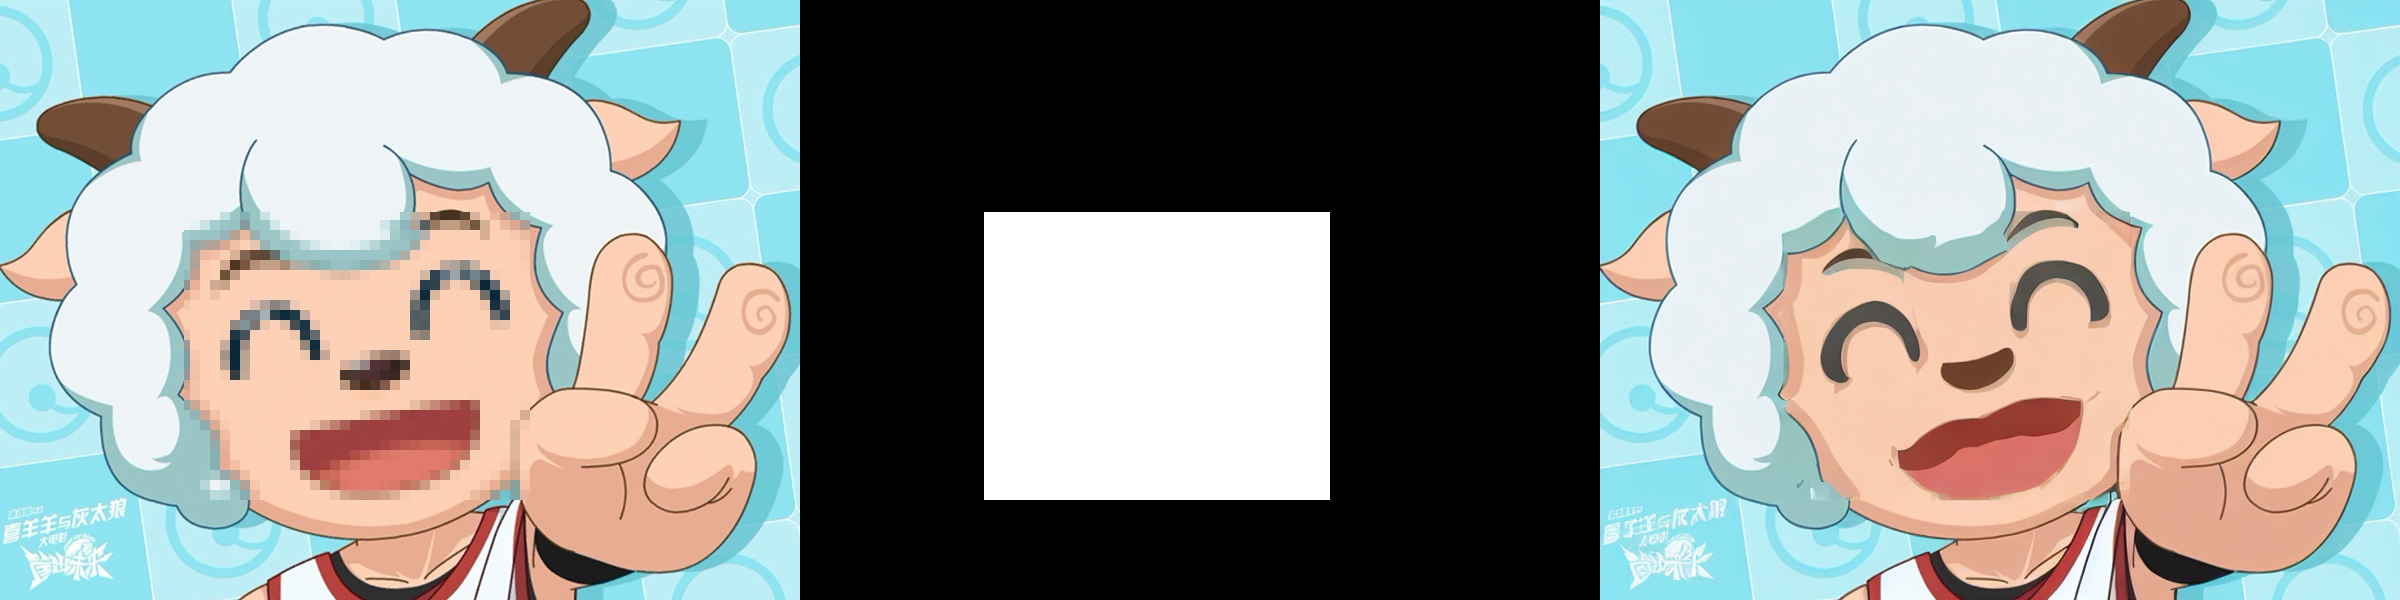

In [4]:
image = pipeline(
    # prompt=prompt,
	prompt_embeds=compel.build_conditioning_tensor(prompt),
    image=init_image,
    mask_image=mask_image,
    # negative_prompt=negative_prompt,
    negative_prompt_embeds=compel.build_conditioning_tensor(negative_prompt),
    guidance_scale=guidance_scale,
    # height=img_height, 
    # width=img_width,
    generator=generator,
    num_inference_steps=num_inference_steps,
    strength=strength,
    # padding_mask_crop=padding_mask_crop,
).images[0]
image.save("output.jpg")
make_image_grid([init_image, mask_image, image], rows=1, cols=3)